In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [191]:
# 1: read in the tree
from Bio import Phylo
tree = Phylo.read('superfam_all_bacteria_and_archaea_ncbi_taxid.newick.txt', 'newick')

In [366]:
# DO NOT RUN - ~2hrs
# get the species names for each node;  get entire lineage names
# DO NOT Re-RUN - dictionaries saved below

sci_name_dict = dict()
lineage_dict = dict()
parent_tax_id_dict = dict()
full_entrez_dict = dict()

from Bio import Entrez

for leaf in tree.get_terminals(): 
    print(leaf.name)
    Entrez.email = 'aurovsky@cs.stonybrook.edu'  # Put your email here
    handle = Entrez.efetch('taxonomy', id=leaf.name, rettype='xml')
    response = Entrez.read(handle)

    for entry in response:
        sci_name = entry.get('ScientificName')
        lineage_taxa = entry.get('Lineage').split(';')
        sci_name_dict[leaf.name] = sci_name
        lineage_dict[leaf.name] = lineage_taxa
        parent_tax_id_dict[leaf.name] = entry.get('ParentTaxId')
        full_entrez_dict[leaf.name] = entry

import pickle
with open('superfam_all_bacteria_and_archaea_sci_name_dict.txt', 'wb') as handle:
    pickle.dump(sci_name_dict, handle)
with open('superfam_all_bacteria_and_archaea_lineage_dict.txt', 'wb') as handle:
    pickle.dump(lineage_dict, handle)
with open('superfam_all_bacteria_and_archaea_parent_tax_id_dict.txt', 'wb') as handle:
    pickle.dump(parent_tax_id_dict, handle)
with open('superfam_all_bacteria_and_archaea_full_entrez_dict.txt', 'wb') as handle:
    pickle.dump(full_entrez_dict, handle)

565575
505682
1111676
859194
708248
1197325
907287
572263
1129369
272635
767465
347257
243272
347256
943945
512564
262723
267748
1112856
243273
708616
272633
866629
862259
340047
743965
265311
37692
322098
262768
445932
471821
651822
572547
580340
525903
891968
660470
521045
443254
771875
381764
391009
484019
416591
126740
590168
390874
243274
309803
688269
403833
515635
309799
511051
572544
190304
519441
523794
526218
568816
591001
158847
546271
927704
479436
1064535
650150
39492
720554
203119
663278
853
697329
40518
41978
357809
610130
40520
33039
751585
585394
166486
515622
831
642492
931626
657317
515619
515620
903814
693746
699246
245012
245014
245018
499177
272563
546269
350688
293826
1029718
755731
394503
573061
290402
748727
431943
272562
386415
212717
413999
195103
644966
679936
292459
525919
334413
646529
768706
756499
138119
1147129
1131462
645991
485916
760568
868595
349161
696281
477974
370438
635013
643648
335541
498761
858215
580327
608506
632518
632516
632335
632348
521

399550
583356
453591
272557
694429
415426
419942
273057
330779
273063
1006006
399549
933801
1365176
368408
985053
572478
397948
1104324
178306
410359
444157
384616
340102
698757
999630
768679
228908
374847
756883
188937
269797
192952
679901
644295
547558
259564
1110509
349307
990316
521011
456442
323259
1201294
368407
679926
410358
351160
1041930
304371
572546
693661
224325
589924
593117
1042877
523850
69014
391623
604354
1183377
529709
70601
272844
1185654
406327
402880
456320
419665
647113
880724
644281
243232
579137
573064
573063
339860
224719
420247
634498
1379702
79929
187420
523846
190192
273116
273075
263820
1054217
673860
439481
1333523
406552
797210
543526
547559
478009
64091
348780
362976
469382
523841
309800
272569
634497
485914
795797
416348
519442


In [434]:
# 2: READ in the name mapping dictionaries
import pickle
with open('superfam_all_bacteria_and_archaea_sci_name_dict.txt', 'rb') as handle:
    sci_name_dict = pickle.loads(handle.read())
with open('superfam_all_bacteria_and_archaea_lineage_dict.txt', 'rb') as handle:
    lineage_dict = pickle.loads(handle.read())
sci_name_dict['387662'] = "Candidatus Carsonella ruddii PV"
lineage_dict['387662'] = ['cellular organisms', ' Bacteria', ' Proteobacteria', ' Gammaproteobacteria', ' Oceanospirillales', ' Halomonadaceae', ' Zymobacter group', ' Candidatus Carsonella', ' Candidatus Carsonella ruddii']

In [389]:
with open('superfam_all_bacteria_and_archaea_parent_tax_id_dict.txt', 'rb') as handle:
    parent_taxid_dict = pickle.loads(handle.read())
parent_taxid_dict['387662'] = '114186'

In [193]:
# 3: give names to internal nodes: numbers from 0, as long as they are not already used for leaf node tax ids
count_leaf = 0
count_inner = 0
name_counter = 0

leaf_list = []
for leaf in tree.get_terminals():
    leaf_list.append(leaf.name)
    
for node in tree.find_clades():
    if (node.is_terminal()):
        count_leaf += 1
    else:
        while(str(name_counter) in leaf_list):
            name_counter += 1
        node.name = str(name_counter)        
        name_counter += 1
        count_inner += 1
#print(count_leaf) 1273
#print(count_inner) 1272

In [267]:
# 4: write out the edgelist file: connections between all the nodes, parent to child
f = open('superfam_all_bacteria_and_archaea_tree_edge_list.tsv','w')
for node in tree.find_clades():
    if ( not node.is_terminal()):
        #print("node ", node.name)
        for i in node.clades:
            f.write(node.name + "\t" + i.name + "\n")
f.close()

In [190]:
# DO NOT Re-RUN - saved into a file (unless updating) ~2hrs
# pairwise distances between all nodes in a tree, including all the internal nodes

count = 0
all_tree_pairwise_distances_dict = dict()
for node in tree.find_clades():
    count += 1
    all_tree_pairwise_distances_dict[node.name] = dict()
    for node2 in tree.find_clades():
        if (node.name != node2.name):
            all_tree_pairwise_distances_dict[node.name][node2.name] = tree.distance(node, node2)            
    print("done processing ", str(count), " , ", node.name)

import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_distances.txt', 'wb') as handle:
    pickle.dump(all_tree_pairwise_distances_dict, handle)

done processing  1  ,  None
done processing  2  ,  None
done processing  3  ,  None
done processing  4  ,  None
done processing  5  ,  None
done processing  6  ,  None
done processing  7  ,  None
done processing  8  ,  None
done processing  9  ,  None
done processing  10  ,  None
done processing  11  ,  None
done processing  12  ,  None
done processing  13  ,  None


KeyboardInterrupt: 

In [210]:
depths_dict = tree.depths(unit_branch_lengths=True)

In [211]:
# DO NOT Re-RUN - saved into a file (unless updating) ~3hrs
# pairwise links between all nodes in a tree, including all the internal nodes

count = 0
all_tree_pairwise_links_dict = dict()
for node in tree.find_clades():
    count += 1
    all_tree_pairwise_links_dict[node.name] = dict()
    for node2 in tree.find_clades():
        if (node.name != node2.name):
            mrca = tree.common_ancestor(node, node2)
            dist = (depths_dict[node] - depths_dict[mrca]) + (depths_dict[node2] - depths_dict[mrca])
            all_tree_pairwise_links_dict[node.name][node2.name] = dist
            #print(node2.name + " " + str(dist))
    print("done processing ", str(count), " , ", node.name)
    #if (count > 1):
     #   break

import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_links.txt', 'wb') as handle:
    pickle.dump(all_tree_pairwise_links_dict, handle)

done processing  1  ,  0
done processing  2  ,  1
done processing  3  ,  2
done processing  4  ,  3
done processing  5  ,  4
done processing  6  ,  5
done processing  7  ,  6
done processing  8  ,  7
done processing  9  ,  8
done processing  10  ,  9
done processing  11  ,  10
done processing  12  ,  11
done processing  13  ,  12
done processing  14  ,  13
done processing  15  ,  14
done processing  16  ,  565575
done processing  17  ,  505682
done processing  18  ,  15
done processing  19  ,  16
done processing  20  ,  17
done processing  21  ,  18
done processing  22  ,  19
done processing  23  ,  20
done processing  24  ,  21
done processing  25  ,  22
done processing  26  ,  23
done processing  27  ,  24
done processing  28  ,  1111676
done processing  29  ,  859194
done processing  30  ,  25
done processing  31  ,  708248
done processing  32  ,  1197325
done processing  33  ,  907287
done processing  34  ,  572263
done processing  35  ,  1129369
done processing  36  ,  272635
done

done processing  278  ,  643648
done processing  279  ,  335541
done processing  280  ,  498761
done processing  281  ,  144
done processing  282  ,  145
done processing  283  ,  146
done processing  284  ,  147
done processing  285  ,  148
done processing  286  ,  149
done processing  287  ,  150
done processing  288  ,  858215
done processing  289  ,  580327
done processing  290  ,  151
done processing  291  ,  152
done processing  292  ,  153
done processing  293  ,  154
done processing  294  ,  155
done processing  295  ,  608506
done processing  296  ,  632518
done processing  297  ,  156
done processing  298  ,  632516
done processing  299  ,  632335
done processing  300  ,  157
done processing  301  ,  632348
done processing  302  ,  521460
done processing  303  ,  632292
done processing  304  ,  351627
done processing  305  ,  555079
done processing  306  ,  697281
done processing  307  ,  158
done processing  308  ,  159
done processing  309  ,  160
done processing  310  ,  16

done processing  547  ,  412694
done processing  548  ,  572264
done processing  549  ,  315730
done processing  550  ,  592021
done processing  551  ,  280
done processing  552  ,  281
done processing  553  ,  666686
done processing  554  ,  941639
done processing  555  ,  592022
done processing  556  ,  282
done processing  557  ,  283
done processing  558  ,  284
done processing  559  ,  272558
done processing  560  ,  66692
done processing  561  ,  398511
done processing  562  ,  649639
done processing  563  ,  285
done processing  564  ,  358681
done processing  565  ,  286
done processing  566  ,  287
done processing  567  ,  324057
done processing  568  ,  1116391
done processing  569  ,  288
done processing  570  ,  985665
done processing  571  ,  1052684
done processing  572  ,  289
done processing  573  ,  562970
done processing  574  ,  521098
done processing  575  ,  290
done processing  576  ,  291
done processing  577  ,  292
done processing  578  ,  293
done processing  

done processing  815  ,  247156
done processing  816  ,  413
done processing  817  ,  414
done processing  818  ,  415
done processing  819  ,  416
done processing  820  ,  417
done processing  821  ,  418
done processing  822  ,  419
done processing  823  ,  243243
done processing  824  ,  487521
done processing  825  ,  420
done processing  826  ,  421
done processing  827  ,  422
done processing  828  ,  423
done processing  829  ,  424
done processing  830  ,  425
done processing  831  ,  1773
done processing  832  ,  478434
done processing  833  ,  410289
done processing  834  ,  572418
done processing  835  ,  1048245
done processing  836  ,  561304
done processing  837  ,  426
done processing  838  ,  216594
done processing  839  ,  362242
done processing  840  ,  710685
done processing  841  ,  427
done processing  842  ,  428
done processing  843  ,  429
done processing  844  ,  430
done processing  845  ,  350058
done processing  846  ,  350054
done processing  847  ,  164757

done processing  1081  ,  1316444
done processing  1082  ,  547
done processing  1083  ,  595499
done processing  1084  ,  641892
done processing  1085  ,  548
done processing  1086  ,  755732
done processing  1087  ,  926562
done processing  1088  ,  549
done processing  1089  ,  550
done processing  1090  ,  551
done processing  1091  ,  552
done processing  1092  ,  553
done processing  1093  ,  554
done processing  1094  ,  746697
done processing  1095  ,  216432
done processing  1096  ,  983548
done processing  1097  ,  555
done processing  1098  ,  983544
done processing  1099  ,  313598
done processing  1100  ,  556
done processing  1101  ,  655815
done processing  1102  ,  411154
done processing  1103  ,  557
done processing  1104  ,  558
done processing  1105  ,  313603
done processing  1106  ,  559
done processing  1107  ,  313596
done processing  1108  ,  886377
done processing  1109  ,  560
done processing  1110  ,  63186
done processing  1111  ,  561
done processing  1112 

done processing  1341  ,  573370
done processing  1342  ,  363253
done processing  1343  ,  676
done processing  1344  ,  485915
done processing  1345  ,  525897
done processing  1346  ,  677
done processing  1347  ,  678
done processing  1348  ,  644282
done processing  1349  ,  679
done processing  1350  ,  760142
done processing  1351  ,  673862
done processing  1352  ,  680
done processing  1353  ,  681
done processing  1354  ,  682
done processing  1355  ,  880072
done processing  1356  ,  56780
done processing  1357  ,  706587
done processing  1358  ,  335543
done processing  1359  ,  683
done processing  1360  ,  684
done processing  1361  ,  685
done processing  1362  ,  686
done processing  1363  ,  687
done processing  1364  ,  269799
done processing  1365  ,  663917
done processing  1366  ,  688
done processing  1367  ,  316067
done processing  1368  ,  351605
done processing  1369  ,  689
done processing  1370  ,  443144
done processing  1371  ,  404380
done processing  137

done processing  1602  ,  806
done processing  1603  ,  807
done processing  1604  ,  808
done processing  1605  ,  809
done processing  1606  ,  810
done processing  1607  ,  349124
done processing  1608  ,  1335757
done processing  1609  ,  187272
done processing  1610  ,  811
done processing  1611  ,  396588
done processing  1612  ,  396595
done processing  1613  ,  555778
done processing  1614  ,  812
done processing  1615  ,  813
done processing  1616  ,  814
done processing  1617  ,  105559
done processing  1618  ,  323261
done processing  1619  ,  472759
done processing  1620  ,  815
done processing  1621  ,  572477
done processing  1622  ,  765911
done processing  1623  ,  816
done processing  1624  ,  817
done processing  1625  ,  271065
done processing  1626  ,  857087
done processing  1627  ,  243233
done processing  1628  ,  818
done processing  1629  ,  819
done processing  1630  ,  821
done processing  1631  ,  661367
done processing  1632  ,  400673
done processing  1633

done processing  1862  ,  940
done processing  1863  ,  941
done processing  1864  ,  942
done processing  1865  ,  225849
done processing  1866  ,  943
done processing  1867  ,  458817
done processing  1868  ,  398579
done processing  1869  ,  425104
done processing  1870  ,  944
done processing  1871  ,  392500
done processing  1872  ,  637905
done processing  1873  ,  550540
done processing  1874  ,  945
done processing  1875  ,  357804
done processing  1876  ,  314282
done processing  1877  ,  167879
done processing  1878  ,  946
done processing  1879  ,  947
done processing  1880  ,  948
done processing  1881  ,  983545
done processing  1882  ,  1085623
done processing  1883  ,  949
done processing  1884  ,  715451
done processing  1885  ,  314275
done processing  1886  ,  950
done processing  1887  ,  203122
done processing  1888  ,  951
done processing  1889  ,  952
done processing  1890  ,  225937
done processing  1891  ,  953
done processing  1892  ,  1163748
done processing  

done processing  2120  ,  272630
done processing  2121  ,  440085
done processing  2122  ,  441620
done processing  2123  ,  426355
done processing  2124  ,  1070
done processing  2125  ,  426117
done processing  2126  ,  460265
done processing  2127  ,  1071
done processing  2128  ,  1072
done processing  2129  ,  1073
done processing  2130  ,  1074
done processing  2131  ,  323098
done processing  2132  ,  323097
done processing  2133  ,  1031710
done processing  2134  ,  316055
done processing  2135  ,  1075
done processing  2136  ,  224911
done processing  2137  ,  114615
done processing  2138  ,  1076
done processing  2139  ,  1077
done processing  2140  ,  639283
done processing  2141  ,  1078
done processing  2142  ,  78245
done processing  2143  ,  438753
done processing  2144  ,  1079
done processing  2145  ,  1080
done processing  2146  ,  395965
done processing  2147  ,  395963
done processing  2148  ,  187303
done processing  2149  ,  1081
done processing  2150  ,  1082
don

done processing  2376  ,  1197
done processing  2377  ,  444157
done processing  2378  ,  384616
done processing  2379  ,  1198
done processing  2380  ,  340102
done processing  2381  ,  698757
done processing  2382  ,  1199
done processing  2383  ,  999630
done processing  2384  ,  768679
done processing  2385  ,  1200
done processing  2386  ,  228908
done processing  2387  ,  374847
done processing  2388  ,  756883
done processing  2389  ,  1201
done processing  2390  ,  1202
done processing  2391  ,  1203
done processing  2392  ,  1204
done processing  2393  ,  1205
done processing  2394  ,  1206
done processing  2395  ,  1207
done processing  2396  ,  1208
done processing  2397  ,  188937
done processing  2398  ,  269797
done processing  2399  ,  192952
done processing  2400  ,  1209
done processing  2401  ,  1210
done processing  2402  ,  679901
done processing  2403  ,  1211
done processing  2404  ,  644295
done processing  2405  ,  547558
done processing  2406  ,  259564
done pr

In [212]:
# 5: read all distances from the files
import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_distances.txt', 'rb') as handle:
    all_tree_pairwise_distances_dict = pickle.loads(handle.read())
print("loaded all tree pairwise distances")

with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_links.txt', 'rb') as handle:
    all_tree_pairwise_links_dict = pickle.loads(handle.read())
print("loaded all tree pairwise links distances")

loaded all tree pairwise distances
loaded all tree pairwise links distances


In [268]:
# 5_a for each node, get a list of closest neighbors, ranked by link distance and pairwise distance
from operator import itemgetter


for k in [5, 10]:
    
    k_neighbors = k


    f = open("superfam_all_bacteria_and_archaea_tree_edge_list_plus_" + str(k_neighbors) + "_closest_neighbors.tsv",'w')

    edges_added_dict = dict()
    for node in tree.find_clades():
        edges_added_dict[node.name] = dict()

    for node in tree.find_clades():
        #print(node.name)

        # add the tree edges
        if ( not node.is_terminal()): # parent to child
            for i in node.clades:
                if (i.name not in edges_added_dict[node.name]):
                    f.write(node.name + "\t" + i.name + "\n")
                    edges_added_dict[node.name][i.name] = 1

    for node in tree.find_clades():
        #print(node.name)

        # # get all nodes link distances to our node, sorted by link distance
        all_links_dict = all_tree_pairwise_links_dict[node.name]
        key_value_pairs = sorted(all_links_dict.items(), key=itemgetter(1))
        #print(key_value_pairs)

        # get k neighbors
        idx = 0
        while(len(edges_added_dict[node.name]) < k_neighbors):
            neighbor_name = key_value_pairs[idx][0]
            if (neighbor_name not in edges_added_dict[node.name]):
                f.write(node.name + "\t" + neighbor_name + "\n")
                edges_added_dict[node.name][neighbor_name] = 1
            idx += 1    

    f.close()

In [77]:
# 6a: define comparison pairs of edges and order to use for all metrics - all node pairs
comparison_all_node_pairs_dict = dict()
counter = 0
for node1 in tree.find_clades():
    for node2 in tree.find_clades():
        if ((node1.name != node2.name) and ((node1.name, node2.name) not in comparison_all_node_pairs_dict) \
            and ((node2.name, node1.name) not in comparison_all_node_pairs_dict)):
            comparison_all_node_pairs_dict[(node1.name, node2.name)] = 1
    #print("finished for node ", str(counter))
    counter += 1

comparison_all_node_pairs_list = list(comparison_all_node_pairs_dict.keys())
print(len(comparison_all_node_pairs_list))


finished for node  0
finished for node  1
finished for node  2
finished for node  3
finished for node  4
finished for node  5
finished for node  6
finished for node  7
finished for node  8
finished for node  9
finished for node  10
finished for node  11
finished for node  12
finished for node  13
finished for node  14
finished for node  15
finished for node  16
finished for node  17
finished for node  18
finished for node  19
finished for node  20
finished for node  21
finished for node  22
finished for node  23
finished for node  24
finished for node  25
finished for node  26
finished for node  27
finished for node  28
finished for node  29
finished for node  30
finished for node  31
finished for node  32
finished for node  33
finished for node  34
finished for node  35
finished for node  36
finished for node  37
finished for node  38
finished for node  39
finished for node  40
finished for node  41
finished for node  42
finished for node  43
finished for node  44
finished for node  4

finished for node  363
finished for node  364
finished for node  365
finished for node  366
finished for node  367
finished for node  368
finished for node  369
finished for node  370
finished for node  371
finished for node  372
finished for node  373
finished for node  374
finished for node  375
finished for node  376
finished for node  377
finished for node  378
finished for node  379
finished for node  380
finished for node  381
finished for node  382
finished for node  383
finished for node  384
finished for node  385
finished for node  386
finished for node  387
finished for node  388
finished for node  389
finished for node  390
finished for node  391
finished for node  392
finished for node  393
finished for node  394
finished for node  395
finished for node  396
finished for node  397
finished for node  398
finished for node  399
finished for node  400
finished for node  401
finished for node  402
finished for node  403
finished for node  404
finished for node  405
finished fo

finished for node  726
finished for node  727
finished for node  728
finished for node  729
finished for node  730
finished for node  731
finished for node  732
finished for node  733
finished for node  734
finished for node  735
finished for node  736
finished for node  737
finished for node  738
finished for node  739
finished for node  740
finished for node  741
finished for node  742
finished for node  743
finished for node  744
finished for node  745
finished for node  746
finished for node  747
finished for node  748
finished for node  749
finished for node  750
finished for node  751
finished for node  752
finished for node  753
finished for node  754
finished for node  755
finished for node  756
finished for node  757
finished for node  758
finished for node  759
finished for node  760
finished for node  761
finished for node  762
finished for node  763
finished for node  764
finished for node  765
finished for node  766
finished for node  767
finished for node  768
finished fo

finished for node  1088
finished for node  1089
finished for node  1090
finished for node  1091
finished for node  1092
finished for node  1093
finished for node  1094
finished for node  1095
finished for node  1096
finished for node  1097
finished for node  1098
finished for node  1099
finished for node  1100
finished for node  1101
finished for node  1102
finished for node  1103
finished for node  1104
finished for node  1105
finished for node  1106
finished for node  1107
finished for node  1108
finished for node  1109
finished for node  1110
finished for node  1111
finished for node  1112
finished for node  1113
finished for node  1114
finished for node  1115
finished for node  1116
finished for node  1117
finished for node  1118
finished for node  1119
finished for node  1120
finished for node  1121
finished for node  1122
finished for node  1123
finished for node  1124
finished for node  1125
finished for node  1126
finished for node  1127
finished for node  1128
finished for nod

finished for node  1431
finished for node  1432
finished for node  1433
finished for node  1434
finished for node  1435
finished for node  1436
finished for node  1437
finished for node  1438
finished for node  1439
finished for node  1440
finished for node  1441
finished for node  1442
finished for node  1443
finished for node  1444
finished for node  1445
finished for node  1446
finished for node  1447
finished for node  1448
finished for node  1449
finished for node  1450
finished for node  1451
finished for node  1452
finished for node  1453
finished for node  1454
finished for node  1455
finished for node  1456
finished for node  1457
finished for node  1458
finished for node  1459
finished for node  1460
finished for node  1461
finished for node  1462
finished for node  1463
finished for node  1464
finished for node  1465
finished for node  1466
finished for node  1467
finished for node  1468
finished for node  1469
finished for node  1470
finished for node  1471
finished for nod

finished for node  1774
finished for node  1775
finished for node  1776
finished for node  1777
finished for node  1778
finished for node  1779
finished for node  1780
finished for node  1781
finished for node  1782
finished for node  1783
finished for node  1784
finished for node  1785
finished for node  1786
finished for node  1787
finished for node  1788
finished for node  1789
finished for node  1790
finished for node  1791
finished for node  1792
finished for node  1793
finished for node  1794
finished for node  1795
finished for node  1796
finished for node  1797
finished for node  1798
finished for node  1799
finished for node  1800
finished for node  1801
finished for node  1802
finished for node  1803
finished for node  1804
finished for node  1805
finished for node  1806
finished for node  1807
finished for node  1808
finished for node  1809
finished for node  1810
finished for node  1811
finished for node  1812
finished for node  1813
finished for node  1814
finished for nod

finished for node  2126
finished for node  2127
finished for node  2128
finished for node  2129
finished for node  2130
finished for node  2131
finished for node  2132
finished for node  2133
finished for node  2134
finished for node  2135
finished for node  2136
finished for node  2137
finished for node  2138
finished for node  2139
finished for node  2140
finished for node  2141
finished for node  2142
finished for node  2143
finished for node  2144
finished for node  2145
finished for node  2146
finished for node  2147
finished for node  2148
finished for node  2149
finished for node  2150
finished for node  2151
finished for node  2152
finished for node  2153
finished for node  2154
finished for node  2155
finished for node  2156
finished for node  2157
finished for node  2158
finished for node  2159
finished for node  2160
finished for node  2161
finished for node  2162
finished for node  2163
finished for node  2164
finished for node  2165
finished for node  2166
finished for nod

finished for node  2468
finished for node  2469
finished for node  2470
finished for node  2471
finished for node  2472
finished for node  2473
finished for node  2474
finished for node  2475
finished for node  2476
finished for node  2477
finished for node  2478
finished for node  2479
finished for node  2480
finished for node  2481
finished for node  2482
finished for node  2483
finished for node  2484
finished for node  2485
finished for node  2486
finished for node  2487
finished for node  2488
finished for node  2489
finished for node  2490
finished for node  2491
finished for node  2492
finished for node  2493
finished for node  2494
finished for node  2495
finished for node  2496
finished for node  2497
finished for node  2498
finished for node  2499
finished for node  2500
finished for node  2501
finished for node  2502
finished for node  2503
finished for node  2504
finished for node  2505
finished for node  2506
finished for node  2507
finished for node  2508
finished for nod

In [78]:
# NOT USED
# 6b: define comparison pairs of edges and order to use for all metrics - just tree edges
def get_parent(tree, child_clade):
    node_path = tree.get_path(child_clade)
    if (len(node_path) >=2 ):
        return node_path[-2]
    else:
        return None
    
comparison_tree_edges_dict = dict()    
for myclade in tree.find_clades():
    parent = get_parent(tree, myclade)
    if (parent != None):
        comparison_tree_edges_dict[(myclade.name, parent.name)] = 1

comparison_tree_edges_list = list(comparison_tree_edges_dict.keys())
print(len(comparison_tree_edges_list))

2542


In [82]:
# NOT USED
# 6c: define comparison pairs of edges and order to use for all metrics - random n edges, where n is size(tree edges)
from random import randint

n = len(comparison_tree_edges_list)
comparison_n_random_pairs_dict = dict()    

counter = 0
while(counter < n):
    idx = randint(0, len(comparison_all_node_pairs_list))
    if (comparison_all_node_pairs_list[idx] not in comparison_n_random_pairs_dict):
        comparison_n_random_pairs_dict[comparison_all_node_pairs_list[idx]] = 1
        counter += 1
        
comparison_n_random_pairs_list = list(comparison_n_random_pairs_dict.keys())
print(len(comparison_n_random_pairs_list))


2542


In [91]:
# NOT USED
# 6d: define comparison pairs of edges and order to use for all metrics - all node pairs link 2 distance away

def get_link_2_neighbors(tree, my_clade):
    neighbors = []
    # first get the grandparent and the sibling of my_clade
    node_path = tree.get_path(my_clade)
    if (len(node_path) >=3 ):
        neighbors.append(node_path[-3]) # grandparent
    if (len(node_path) >=2 ):
        parent = node_path[-2]
        for child in parent:
            if (child.name != my_clade.name):
                neighbors.append(child) # sibling
    # now get the grandchildren
    for child in my_clade:
        for grandchild in child:
            neighbors.append(grandchild)
    return neighbors

comparison_link_2_neighbor_pairs_dict = dict()
for myclade in tree.find_clades():
    link_2_neighbors = get_link_2_neighbors(tree, myclade)
    added = 0
    for neighbor in link_2_neighbors:
        if ((myclade.name != neighbor.name) and ((myclade.name, neighbor.name) not in comparison_link_2_neighbor_pairs_dict) \
            and ((neighbor.name, myclade.name) not in comparison_link_2_neighbor_pairs_dict)):
            comparison_link_2_neighbor_pairs_dict[(myclade.name, neighbor.name)] = 1
            added += 1
    #print(myclade.name + " " + str(added))   

comparison_link_2_neighbor_pairs_list = list(comparison_link_2_neighbor_pairs_dict.keys())
print(len(comparison_link_2_neighbor_pairs_list))

3813


In [39]:
# 7a: get the list of phylogenetic distances for the comparison order
phylogenetic_distance_all_node_pairs_list = []
for (name1, name2) in comparison_all_node_pairs_list:
    phylogenetic_distance_all_node_pairs_list.append(all_tree_pairwise_distances_dict[name1][name2])

In [236]:
# 7b: get the list of phylogenetic tree links for the comparison order
max_link = 0
max_pair = 0
links_distance_all_node_pairs_list = []
for (name1, name2) in comparison_all_node_pairs_list:
    if (all_tree_pairwise_links_dict[name1][name2] > max_link):
        max_link = all_tree_pairwise_links_dict[name1][name2]
        max_pair = (name1, name2)
    links_distance_all_node_pairs_list.append(all_tree_pairwise_links_dict[name1][name2])
print(max_link) # sanity testing - check the depth of one of the longest link paths, check the lineage of the clades below
print(max_pair)

46
('891391', '347255')


In [251]:
# sanity test for links distance calculation
old_max_pair = ('891391', '347255')
max_pair = old_max_pair
myclade1 = next(tree.find_clades(max_pair[0]))
myclade2 = next(tree.find_clades(max_pair[1]))

mrca = tree.common_ancestor(myclade1, myclade2)
print(depths_dict[myclade1])
print(depths_dict[myclade2])
print(mrca.name)
print(depths_dict[mrca])
dist = (depths_dict[myclade1] - depths_dict[mrca]) + (depths_dict[myclade2] - depths_dict[mrca])
print(dist)
#print(lineage_dict[max_pair[0]])
#print(lineage_dict[max_pair[1]])

24
26
2
2
46


In [315]:
# 8: generate random embeddings

import numpy as np

random_embeddings = dict()
for d in [2, 5, 10, 20, 100]:
    random_embeddings[d] = dict()
    for node in tree.find_clades():
        random_embeddings[d][node.name] = np.random.uniform(-1,1,d)

In [139]:
print("bla")

bla


In [316]:
# 9: get lists of euclidean distances for random embeddings for comparsion order - do for all node pairs

random_embeddings_euclidean_distance_dict = dict()

for d in [2, 5, 10, 20, 100]:
    random_embeddings_euclidean_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(random_embeddings[d][name1])   
        two = np.array(random_embeddings[d][name2])
        eval_distance = np.linalg.norm(one-two)
        #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
        random_embeddings_euclidean_distance_dict[d].append(eval_distance)

In [324]:
# 10a:  run deepwalk for d=2, 5, 10, 20
# https://github.com/phanein/deepwalk
# takes about 20 minutes with the settings below;  1 minute with cython enabled
#time deepwalk --format edgelist --input ../phylogeny_embeddings/superfam_all_bacteria_and_archaea_tree_edge_list.tsv 
#--output ../phylogeny_embeddings/superfam_all_bacteria_and_archaea_deepwalk_embeddings_10d 
#--workers 20 --representation-size 10&

# the output files are of the form: superfam_all_bacteria_and_archaea_deepwalk_embeddings_*d

deepwalk_embeddings_euclidean_distance_dict = dict()
import csv
# extract the output of all the files, and compute the euclidean distances of all the pairs
for d in [2, 5, 10, 20, 100]:
    fname = "superfam_all_bacteria_and_archaea_deepwalk_embeddings_" + str(d) + "d"
    csvfile = open(fname)
    reader = csv.reader(csvfile, delimiter=' ')
    next(reader)
    deepwalk_embeddings = dict()
    for row in reader:
        deepwalk_embeddings[row[0]] = list(map(float, row[1:]))

    deepwalk_embeddings_euclidean_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(deepwalk_embeddings[name1])
        two = np.array(deepwalk_embeddings[name2])
        eval_distance = np.linalg.norm(one-two)
        #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
        deepwalk_embeddings_euclidean_distance_dict[d].append(eval_distance)
        
for k in [5, 10]:        
    # extract the output of all the files, and compute the euclidean distances of all the pairs
    for d in [2, 5, 10, 20, 100]:
        fname = "superfam_all_bacteria_and_archaea_deepwalk_embeddings_plus_" + str(k) + "_closest_neighbors_" + str(d) + "d"
        csvfile = open(fname)
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        deepwalk_embeddings = dict()
        for row in reader:
            deepwalk_embeddings[row[0]] = list(map(float, row[1:]))

        deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)] = []
        for (name1, name2) in comparison_all_node_pairs_list:
            one = np.array(deepwalk_embeddings[name1])
            two = np.array(deepwalk_embeddings[name2])
            eval_distance = np.linalg.norm(one-two)
            #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
            deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)].append(eval_distance)

In [319]:
# 10b: run poincare for d=2, 5, 10, 20
# github:  https://github.com/TatsuyaShirakawa/poincare-embedding
# paper: https://arxiv.org/pdf/1705.08039.pdf
# example:
#./poincare_embedding 
#../../phylogeny_embeddings/superfam_all_bacteria_and_archaea_tree_edge_list_plus_5_closest_neighbors.tsv 
#../../phylogeny_embeddings/superfam_all_bacteria_and_archaea_poincare_embeddings_plus_5_closest_neighbors_10d 
#-d 10 -t 8 -e 1000 -l 0.1 -L 0.0001 -n 20 -s 0&

# the output files are of the form superfam_all_bacteria_and_archaea_poincare_embeddings_plus_10_closest_neighbors_*jkd 
poincare_embeddings_poincare_distance_dict = dict()
import csv
import math
# extract the output of all the files, and compute the poincare distances of all the pairs
for d in [2, 5, 10, 20, 100]:
    fname = "superfam_all_bacteria_and_archaea_poincare_embeddings_" + str(d) + "d"
    csvfile = open(fname)
    reader = csv.reader(csvfile, delimiter='\t')
    poincare_embeddings = dict()
    for row in reader:
        poincare_embeddings[row[0]] = list(map(float, row[1:]))
    
    poincare_embeddings_poincare_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(poincare_embeddings[name1])  
        two = np.array(poincare_embeddings[name2])
        poincare_eval_dist = math.acosh(1 + 2*(math.pow(np.linalg.norm(one-two), 2)\
                                /( (1-math.pow(np.linalg.norm(one), 2)) * (1-math.pow(np.linalg.norm(two), 2)) )))
        poincare_embeddings_poincare_distance_dict[d].append(poincare_eval_dist)

for k in [5, 10]:         
    for d in [2, 5, 10, 20, 100]:
        fname = "superfam_all_bacteria_and_archaea_poincare_embeddings_plus_" + str(k) + "_closest_neighbors_" + str(d) + "d"
        csvfile = open(fname)
        reader = csv.reader(csvfile, delimiter='\t')
        poincare_embeddings = dict()
        for row in reader:
            poincare_embeddings[row[0]] = list(map(float, row[1:]))

        poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)] = []
        for (name1, name2) in comparison_all_node_pairs_list:
            one = np.array(poincare_embeddings[name1])  
            two = np.array(poincare_embeddings[name2])
            poincare_eval_dist = math.acosh(1 + 2*(math.pow(np.linalg.norm(one-two), 2)\
                                    /( (1-math.pow(np.linalg.norm(one), 2)) * (1-math.pow(np.linalg.norm(two), 2)) )))
            poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)].append(poincare_eval_dist)

In [176]:
# 11: generate metrics for random
from scipy.stats import spearmanr
from scipy.stats import pearsonr
metrics_table = []
metrics_header = ["embedding_method", "dimension", "m1: spearman r, all pairs", "m2: pearson r, all pairs"]
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson =  pearsonr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["random", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

In [178]:
# 12: add metrics for deepwalk
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["deepwalk", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

In [179]:
# 13: add metrics for poincare
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    metrics_table.append(["poincare", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

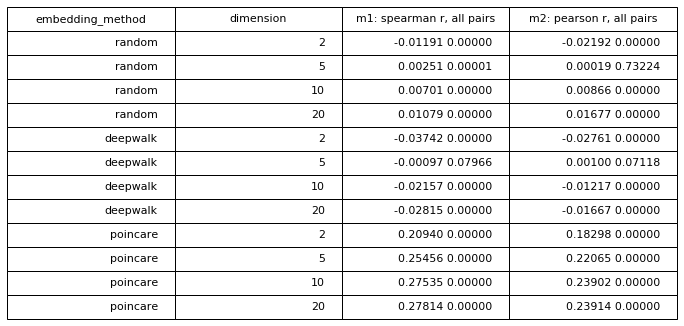

In [180]:
# Generate the table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from matplotlib.table import table

#plt.figure(1, figsize=(20, 1))
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=metrics_table, colLabels=metrics_header, loc='center')
the_table.set_fontsize(34)
the_table.scale(2, 2)
plt.show()

In [273]:
# 12: add metrics for deepwalk
# 11: generate metrics for random
from scipy.stats import spearmanr
from scipy.stats import pearsonr
metrics_table = []
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson =  pearsonr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson_l =  pearsonr(links_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["random", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])

for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson_l = pearsonr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["deepwalk", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])

# 13: add metrics for poincare
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson_l = pearsonr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    metrics_table.append(["poincare", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])



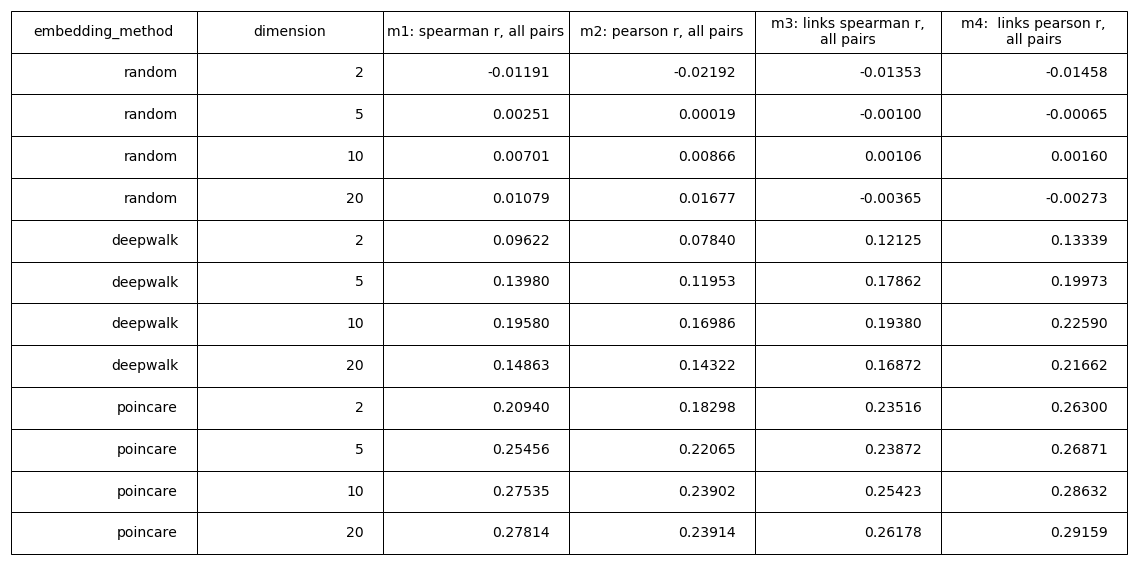

In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from matplotlib.table import table

plt.figure(1, figsize=(20, 10))
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

metrics_header = ["embedding_method", "dimension", "m1: spearman r, all pairs", "m2: pearson r, all pairs", "m3: links spearman r,\nall pairs", "m4:  links pearson r,\nall pairs"]


the_table = ax.table(cellText=metrics_table, colLabels=metrics_header, loc='center', bbox=(0, 0, 1, 1))
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
plt.show()

In [325]:
# 12: add metrics for deepwalk
# 11: generate metrics for random
from scipy.stats import spearmanr
from scipy.stats import pearsonr
metrics_table = []
for d in [2, 5, 10, 20, 100]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson =  pearsonr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson_l =  pearsonr(links_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["random", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])

for d in [2, 5, 10, 20, 100]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson_l = pearsonr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["deepwalk", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])

# 13: add metrics for poincare
for d in [2, 5, 10, 20, 100]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson_l = pearsonr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    metrics_table.append(["poincare", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])
    
for k in [5, 10]: 
    
    for d in [2, 5, 10, 20, 100]:
        spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)])
        pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)])
        spearman_l = spearmanr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)])
        pearson_l = pearsonr(links_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[str(k) + "_" + str(d)])
        metrics_table.append(["deepwalk_plus_" + str(k) + "n" , str(d), \
        '%.5f' % spearman[0] , \
        '%.5f' % pearson[0], \
        '%.5f' % spearman_l[0] , \
        '%.5f' % pearson_l[0]])

    # 13: add metrics for poincare
    for d in [2, 5, 10, 20, 100]:
        spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)])
        pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)])
        spearman_l = spearmanr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)])
        pearson_l = pearsonr(links_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[str(k) + "_" + str(d)])
        metrics_table.append(["poincare_plus_" + str(k) + "n", str(d), \
        '%.5f' % spearman[0] , \
        '%.5f' % pearson[0], \
        '%.5f' % spearman_l[0] , \
        '%.5f' % pearson_l[0]])

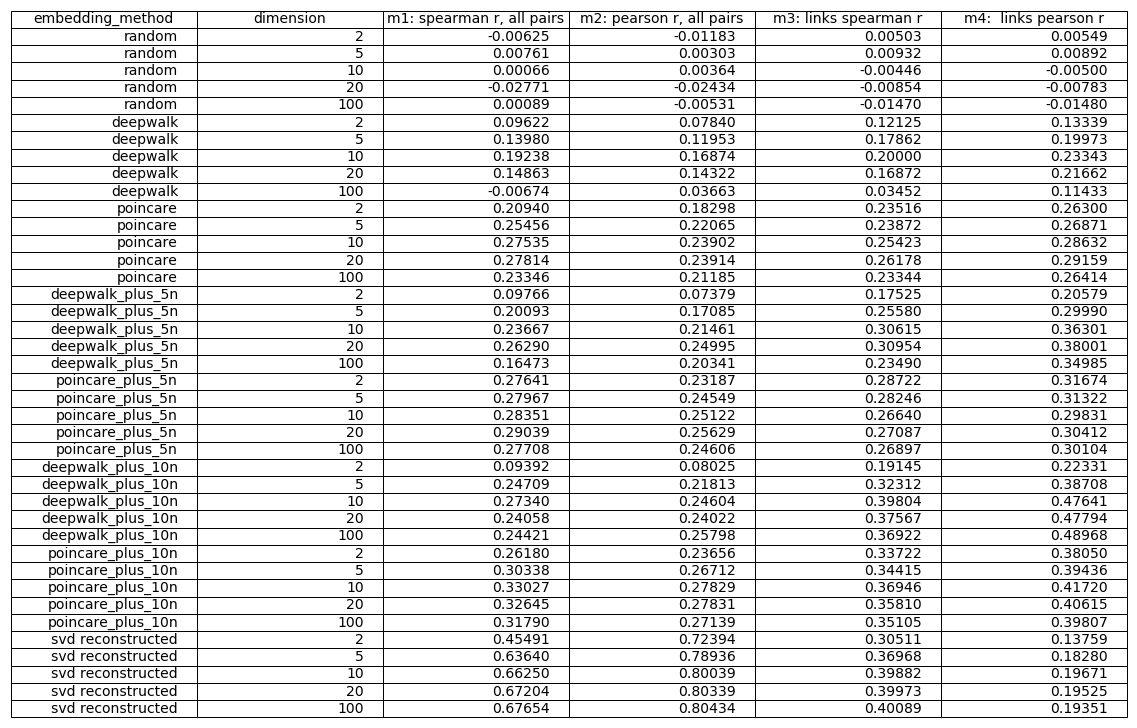

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from matplotlib.table import table

plt.figure(1, figsize=(20, 13))
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

metrics_header = ["embedding_method", "dimension", "m1: spearman r, all pairs", "m2: pearson r, all pairs", "m3: links spearman r", "m4:  links pearson r"]


the_table = ax.table(cellText=metrics_table, colLabels=metrics_header, loc='center', bbox=(0, 0, 1, 1))
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
plt.show()

In [328]:
m1_max = 0
m1_name = ""
m2_max = 0
m2_name = ""
m3_max = 0
m3_name = ""
m4_max = 0
m4_name = ""
for row in metrics_table:
    if (float(row[2]) > m1_max):
        m1_max = float(row[2])
        m1_name = row[:2]
    if (float(row[3]) > m2_max):
        m2_max = float(row[3])
        m2_name = row[:2]
    if (float(row[4]) > m3_max):
        m3_max = float(row[4])
        m3_name = row[:2]
    if (float(row[5]) > m4_max):
        m4_max = float(row[5])
        m4_name = row[:2]
m1_name.append(m1_max)
print("spearman, with phylogenetic distances")
print(m1_name)
m2_name.append(m2_max)
print("\npearson, with phylogenetic distances")
print(m2_name)
m3_name.append(m3_max)
print("\nspearman, with link distances")
print(m3_name)
m4_name.append(m4_max)
print("\npearson, with link distances")
print(m4_name)

spearman, with phylogenetic distances
['svd reconstructed', '100', 0.67654]

pearson, with phylogenetic distances
['svd reconstructed', '100', 0.80434]

spearman, with link distances
['svd reconstructed', '100', 0.40089]

pearson, with link distances
['deepwalk_plus_10n', '100', 0.48968]


In [304]:
x = [[0, 2, 3, 9, 10], [3, 0, 5, 11, 12], [6, 7, 0, 13, 14], [15, 16, 17, 0, 19], [20, 21, 22, 23, 0]]
x = []
for t in range(0, 5):
    temp = []
    for p in range(0, 5):
        temp.append(p)
    x.append(temp)
print(x)
from numpy.linalg import svd
u,s,v  = svd(x,0)
embedding = (u*s)[:,:2]
print(embedding)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
[[ -5.47722558e+00  -1.06581410e-15]
 [ -5.47722558e+00   2.66453526e-16]
 [ -5.47722558e+00   2.66453526e-16]
 [ -5.47722558e+00   2.66453526e-16]
 [ -5.47722558e+00   2.66453526e-16]]


In [305]:
all_tree_pairwise_distances_for_svd = []
for node in tree.find_clades():
    temp_list = []
    for node2 in tree.find_clades():
        if (node.name != node2.name):
            temp_list.append(all_tree_pairwise_distances_dict[node.name][node2.name])           
        else:
            temp_list.append(0.0)
    all_tree_pairwise_distances_for_svd.append(temp_list)

In [306]:
# https://www.programcreek.com/python/example/63657/numpy.linalg.svd

u,s,v  = svd(all_tree_pairwise_distances_for_svd,0)

In [443]:
d = 10
    
embedding = (u*s)[:,:d]
reconstructed_embeddings = dict()
idx = 0
for node in tree.find_clades():
    reconstructed_embeddings[node.name] = embedding[idx]
    idx += 1
print("bla" + str(reconstructed_embeddings['387662']))

bla[-8.24041508 -0.10412902  0.54932782  0.85350282  0.03552059  0.29284422
 -0.0314186   0.17273037  0.06588437  0.08344205]


In [321]:

svd_reconstructed_phylogenetic_euclidean_distance_dict = dict()
import csv
# extract the output of all the files, and compute the euclidean distances of all the pairs
for d in [2, 5, 10, 20, 100]:
    
    embedding = (u*s)[:,:d]
    reconstructed_embeddings = dict()
    idx = 0
    for node in tree.find_clades():
        reconstructed_embeddings[node.name] = embedding[idx]
        idx += 1
        
    svd_reconstructed_phylogenetic_euclidean_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(reconstructed_embeddings[name1])
        two = np.array(reconstructed_embeddings[name2])
        eval_distance = np.linalg.norm(one-two)
        #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
        svd_reconstructed_phylogenetic_euclidean_distance_dict[d].append(eval_distance)

In [326]:
# add metrics for svd
for d in [2, 5, 10, 20, 100]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, svd_reconstructed_phylogenetic_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, svd_reconstructed_phylogenetic_euclidean_distance_dict[d])
    spearman_l = spearmanr(links_distance_all_node_pairs_list, svd_reconstructed_phylogenetic_euclidean_distance_dict[d])
    pearson_l = pearsonr(links_distance_all_node_pairs_list, svd_reconstructed_phylogenetic_euclidean_distance_dict[d])
    metrics_table.append(["svd reconstructed", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0], \
    '%.5f' % spearman_l[0] , \
    '%.5f' % pearson_l[0]])

In [330]:
print(len(all_tree_pairwise_links_dict.keys()))

2545


In [ ]:
# notes for kraken
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053813/
# https://ccb.jhu.edu/software/kraken/
# https://ccb.jhu.edu/software/kraken/MANUAL.html
# DNA, as far as I can tell, database contains kmers from whole genome, 100 base synthetic reads used in benchmarks,
# as well as 50-250pb reads from DNA sequencing
# kraken-translate -db minikraken_20171013_4GB bla > bla_taxonomy


In [452]:
%%time
# get all ncbi ids for the internal nodes
import time
import codecs
import glob
import gzip
import re
import random
files_for_samples_dict = dict()
parents_of_samples = dict()
for leaf in tree.get_terminals(): 
    files_for_samples_dict[leaf.name] = dict()
    files_for_samples_dict[leaf.name]["assembly_prefix"] = None
    if (parent_taxid_dict[leaf.name] in parents_of_samples):
        parents_of_samples[parent_taxid_dict[leaf.name]].append(leaf.name)
    else:
        parents_of_samples[parent_taxid_dict[leaf.name]] = [leaf.name]
print(len(files_for_samples_dict))
found = 0

found_by_taxid = 0
for summary_file in ["/scratch4/moamin/ncbi_bacteria_db/assembly_summary.txt", "/scratch4/moamin/ncbi_archaea_db/assembly_summary.txt"]:
    with codecs.open(summary_file, "r",encoding='utf-8', errors='ignore') as f:
        next(f)
        next(f)
        for row in f:
            data = row.strip().split("\t")
            assembly_prefix = data[0].strip()
            taxid = data[5].strip()
            species_taxid = data[6].strip()
            #print(taxid)
            added = False
            if (taxid in files_for_samples_dict):
                if (files_for_samples_dict[taxid]["assembly_prefix"] == None):
                    found += 1
                    found_by_taxid += 1
                    files_for_samples_dict[taxid]["summary_file"] = summary_file
                    files_for_samples_dict[taxid]["assembly_prefix"] = assembly_prefix
                    files_for_samples_dict[taxid]["info_source"] = "strain"
                elif (files_for_samples_dict[taxid]["info_source"] == "species"):
                    files_for_samples_dict[taxid]["assembly_prefix"] = assembly_prefix
                    files_for_samples_dict[taxid]["info_source"] = "strain"
                else:
                    if ("Complete Genome" in row):
                        files_for_samples_dict[taxid]["assembly_prefix"] = assembly_prefix
            elif((taxid == species_taxid) and (species_taxid in parents_of_samples)):
                for c_taxid in parents_of_samples[species_taxid]:
                    if (files_for_samples_dict[c_taxid]["assembly_prefix"] == None):
                        found += 1
                        files_for_samples_dict[c_taxid]["summary_file"] = summary_file
                        files_for_samples_dict[c_taxid]["assembly_prefix"] = assembly_prefix
                        files_for_samples_dict[c_taxid]["info_source"] = "species"
                    else:
                        if ((files_for_samples_dict[c_taxid]["info_source"] == "species") and ("Complete Genome" in row)):
                            files_for_samples_dict[c_taxid]["assembly_prefix"] = assembly_prefix
                
                
print("found ", found)
print("found by taxid, ", found_by_taxid)
found = 0
lines_per_genome = 10000
length_of_lines = 100
file_write = gzip.open("superfam_all_bacteria_and_archaea_sequences_and_embeddings.gz", "wt")
for tax_id in files_for_samples_dict:
    if (files_for_samples_dict[tax_id]["assembly_prefix"] != None):
        prefix = files_for_samples_dict[tax_id]["assembly_prefix"]
        filename = ""
        if (files_for_samples_dict[tax_id]["summary_file"] == "/scratch4/moamin/ncbi_bacteria_db/assembly_summary.txt"):
            names = glob.glob('/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/' + prefix + '_[a-zA-Z0-9]*?_genomic.fna.gz')
            if (len(names) < 1):
                print("Not Found")
            else:
                for name in names:
                    if (("rna_from_genomic" not in name) and ("cds_from_genomic" not in name)):
                        print(name)
                        filename = name
                found += 1
        elif (files_for_samples_dict[tax_id]["summary_file"] == "/scratch4/moamin/ncbi_archaea_db/assembly_summary.txt"):
            names = glob.glob('/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/' + prefix + '_[a-zA-Z0-9]*?_genomic.fna.gz')
            if (len(names) < 1):
                print("Not Found")
            else:
                for name in names:
                    if (("rna_from_genomic" not in name) and ("cds_from_genomic" not in name)):
                        print(name)
                        filename = name
                found += 1
        if (filename != ""):
            #chrom_to_seq = dict()
            max_sequence_string = ""
            sequence_string = ""
            sequence_name = ""
            with gzip.open(filename, 'rt') as zip_file:
                for line in zip_file:
                    if (line.startswith(">")):
                        if len(sequence_name) > 0 and len(sequence_string) > 0:
                            if (len(sequence_string) > len(max_sequence_string)):
                                max_sequence_string = re.sub(r'([^NACGT])', "N", sequence_string.upper())
                            #print(sequence_name, " ", str(len(sequence_string)))
                        sequence_name = line.split(" ")[0][1:]
                        sequence_string = ""
                    else:
                        sequence_string += line.strip()
                if len(sequence_name) > 0 and len(sequence_string) > 0:
                    if (len(sequence_string) > len(max_sequence_string)):
                        max_sequence_string = re.sub(r'([^NACGT])', "N", sequence_string.upper())
                    #print(sequence_name, " ", str(len(sequence_string)))
            # now print out the lines
            for i in range(0, lines_per_genome):
                idx = random.randint(0, len(max_sequence_string)-length_of_lines-1)
                file_write.write(">" + tax_id + "\n") #sci_name_dict[tax_id] + "\n")
                file_write.write(max_sequence_string[idx:idx+length_of_lines] + "\n")
                file_write.write(str(reconstructed_embeddings[tax_id].tolist()))
                file_write.write("\n")
        #print(len(max_sequence_string))
        print(found)
    #if (found > 1):
       # break
file_write.close()

1273
found  1253
found by taxid,  1247
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000305815.1_ASM30581v1_genomic.fna.gz
1
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000010665.1_ASM1066v1_genomic.fna.gz
2
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000023005.1_ASM2300v1_genomic.fna.gz
3
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024405.1_ASM2440v1_genomic.fna.gz
4
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000092525.1_ASM9252v1_genomic.fna.gz
5
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000025725.1_ASM2572v1_genomic.fna.gz
6
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000014205.1_ASM1420v1_genomic.fna.gz
7
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000026185.1_ASM2618v1_genomic.fna.gz
8
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000236585.1_ASM23658v1_genomic.fna.gz
9
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000306785.1_ASM30678v1_genomic.fna.gz
10
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000012865.1_ASM1286v1_genomic.fna.gz
11

93
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024045.1_ASM2404v1_genomic.fna.gz
94
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000006605.1_ASM660v1_genomic.fna.gz
95
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000018205.1_ASM1820v1_genomic.fna.gz
96
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000022625.1_ASM2262v1_genomic.fna.gz
97
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000154785.2_ASM15478v2_genomic.fna.gz
98
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000317555.1_ASM31755v1_genomic.fna.gz
99
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000270325.1_ASM27032v1_genomic.fna.gz
100
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000016905.1_ASM1690v1_genomic.fna.gz
101
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000021045.1_ASM2104v1_genomic.fna.gz
102
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000166095.1_ASM16609v1_genomic.fna.gz
103
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000013585.1_ASM1358v1_genomic.fna.gz
104
/scratch4/moami

185
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000018865.1_ASM1886v1_genomic.fna.gz
186
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000011385.1_ASM1138v1_genomic.fna.gz
187
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000063585.1_ASM6358v1_genomic.fna.gz
188
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000023385.1_ASM2338v1_genomic.fna.gz
189
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000215745.1_ASM21574v1_genomic.fna.gz
190
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000091785.1_ASM9178v1_genomic.fna.gz
191
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000012765.1_ASM1276v1_genomic.fna.gz
192
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000027205.1_ASM2720v1_genomic.fna.gz
193
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000011305.1_ASM1130v1_genomic.fna.gz
194
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000009925.1_ASM992v1_genomic.fna.gz
195
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000210595.1_ASM21059v1_genomic.fna.gz
196
/scratch4/moamin

277
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000007185.1_ASM718v1_genomic.fna.gz
278
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000259345.1_ASM25934v1_genomic.fna.gz
279
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000015805.1_ASM1580v1_genomic.fna.gz
280
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000214395.1_ASM21439v1_genomic.fna.gz
281
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000015945.1_ASM1594v1_genomic.fna.gz
282
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019665.1_ASM1966v1_genomic.fna.gz
283
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000043285.1_ASM4328v1_genomic.fna.gz
284
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000143685.1_ASM14368v1_genomic.fna.gz
285
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000252855.1_ASM25285v1_genomic.fna.gz
286
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000092985.1_ASM9298v1_genomic.fna.gz
287
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024005.1_ASM2400v1_genomic.fna.gz
288
/scra

369
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000834315.1_ASM83431v1_genomic.fna.gz
370
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000190635.1_ASM19063v1_genomic.fna.gz
371
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000025845.1_ASM2584v1_genomic.fna.gz
372
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000283535.1_ASM28353v1_genomic.fna.gz
373
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000016185.1_ASM1618v1_genomic.fna.gz
374
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000008765.1_ASM876v1_genomic.fna.gz
375
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000410515.1_ASM41051v1_genomic.fna.gz
376
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000090965.1_ASM9096v1_genomic.fna.gz
377
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000023965.1_ASM2396v1_genomic.fna.gz
378
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000008645.1_ASM864v1_genomic.fna.gz
379
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000016125.1_ASM1612v1_genomic.fna.gz
380
/scrat

461
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000195555.1_ASM19555v1_genomic.fna.gz
462
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019085.1_ASM1908v1_genomic.fna.gz
463
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000223215.1_ASM22321v1_genomic.fna.gz
464
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000210675.1_ASM21067v1_genomic.fna.gz
465
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019145.1_ASM1914v1_genomic.fna.gz
466
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000012965.1_ASM1296v1_genomic.fna.gz
467
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000025625.1_ASM2562v1_genomic.fna.gz
468
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_001660005.1_ASM166000v1_genomic.fna.gz
469
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000022485.1_ASM2248v1_genomic.fna.gz
470
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000018145.1_ASM1814v1_genomic.fna.gz
471
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000018085.1_ASM1808v1_genomic.fna.gz
472
/scrat

553
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000270285.1_ASM27028v1_genomic.fna.gz
554
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000194805.1_ASM19480v1_genomic.fna.gz
555
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024925.1_ASM2492v1_genomic.fna.gz
556
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000166295.1_ASM16629v1_genomic.fna.gz
557
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000015085.1_ASM1508v1_genomic.fna.gz
558
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024105.1_ASM2410v1_genomic.fna.gz
559
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000010985.1_ASM1098v1_genomic.fna.gz
560
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000271325.1_ASM27132v1_genomic.fna.gz
561
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000012925.1_ASM1292v1_genomic.fna.gz
562
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000144605.1_ASM14460v1_genomic.fna.gz
563
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000283975.1_ASM28397v1_genomic.fna.gz
564
/scratch4/m

645
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000023245.1_ASM2324v1_genomic.fna.gz
646
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000214375.1_ASM21437v1_genomic.fna.gz
647
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024885.1_ASM2488v1_genomic.fna.gz
648
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000092405.1_ASM9240v1_genomic.fna.gz
649
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000020985.1_ASM2098v1_genomic.fna.gz
650
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000014685.1_ASM1468v1_genomic.fna.gz
651
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000236605.1_ASM23660v1_genomic.fna.gz
652
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019685.1_ASM1968v1_genomic.fna.gz
653
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000328765.2_ASM32876v2_genomic.fna.gz
654
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024805.1_ASM2480v1_genomic.fna.gz
655
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000271405.2_ASM27140v2_genomic.fna.gz
656
/scratch4/moa

737
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024385.1_ASM2438v1_genomic.fna.gz
738
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000163895.2_ASM16389v2_genomic.fna.gz
739
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000204925.1_ASM20492v1_genomic.fna.gz
740
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000505665.1_ASM50566v1_genomic.fna.gz
741
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000021885.1_ASM2188v1_genomic.fna.gz
742
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000018365.1_ASM1836v1_genomic.fna.gz
743
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000144405.1_ASM14440v1_genomic.fna.gz
744
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019765.1_ASM1976v1_genomic.fna.gz
745
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000316645.1_ASM31664v1_genomic.fna.gz
746
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000014065.1_ASM1406v1_genomic.fna.gz
747
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000230555.1_ASM23055v1_genomic.fna.gz
748
/scra

829
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019225.1_ASM1922v1_genomic.fna.gz
830
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000027165.1_ASM2716v1_genomic.fna.gz
831
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000225345.1_ASM22534v1_genomic.fna.gz
832
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000010705.1_ASM1070v1_genomic.fna.gz
833
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000025345.1_ASM2534v1_genomic.fna.gz
834
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000020025.1_ASM2002v1_genomic.fna.gz
835
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000024625.1_ASM2462v1_genomic.fna.gz
836
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000237085.1_ASM23708v1_genomic.fna.gz
837
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000503835.1_ASM50383v1_genomic.fna.gz
838
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000022085.1_ASM2208v1_genomic.fna.gz
839
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000210715.1_ASM21071v1_genomic.fna.gz
840
/scratch4/

921
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000195575.1_ASM19557v1_genomic.fna.gz
922
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000493735.1_ASM49373v1_genomic.fna.gz
923
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000046845.1_ASM4684v1_genomic.fna.gz
924
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000195695.1_ASM19569v1_genomic.fna.gz
925
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000017945.1_ASM1794v1_genomic.fna.gz
926
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024365.1_ASM2436v1_genomic.fna.gz
927
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000237325.1_ASM23732v1_genomic.fna.gz
928
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000252955.1_ASM25295v1_genomic.fna.gz
929
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000020365.1_ASM2036v1_genomic.fna.gz
930
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000214785.1_ASM21478v1_genomic.fna.gz
931
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000281175.1_ASM28117v1_genomic.fna.gz
932
/scratc

/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019365.1_ASM1936v1_genomic.fna.gz
1013
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000283515.1_ASM28351v1_genomic.fna.gz
1014
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000224085.1_ASM22408v1_genomic.fna.gz
1015
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000025085.1_ASM2508v1_genomic.fna.gz
1016
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000022105.1_ASM2210v1_genomic.fna.gz
1017
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000010725.1_ASM1072v1_genomic.fna.gz
1018
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000018565.1_ASM1856v1_genomic.fna.gz
1019
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000026205.1_ASM2620v1_genomic.fna.gz
1020
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000092385.1_ASM9238v1_genomic.fna.gz
1021
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000023725.1_ASM2372v1_genomic.fna.gz
1022
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000513475.1_Bbla_genomic.fna.gz
1023
/scratch4/moa

1103
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000021725.1_ASM2172v1_genomic.fna.gz
1104
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000020045.1_ASM2004v1_genomic.fna.gz
1105
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000008625.1_ASM862v1_genomic.fna.gz
1106
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000184685.1_ASM18468v1_genomic.fna.gz
1107
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000223375.1_ASM22337v1_genomic.fna.gz
1108
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000020865.1_ASM2086v1_genomic.fna.gz
1109
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000196435.1_ASM19643v1_genomic.fna.gz
1110
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000014625.1_ASM1462v1_genomic.fna.gz
1111
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000016345.1_ASM1634v1_genomic.fna.gz
1112
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000023065.1_ASM2306v1_genomic.fna.gz
1113
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000024065.1_ASM2406v1_genomic.fna.gz
1114
/sc

1194
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000283635.1_ASM28363v1_genomic.fna.gz
1195
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000011065.1_ASM1106v1_genomic.fna.gz
1196
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000219045.1_ASM21904v1_genomic.fna.gz
1197
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000231015.3_ASM23101v3_genomic.fna.gz
1198
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000092305.1_ASM9230v1_genomic.fna.gz
1199
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000196835.1_ASM19683v1_genomic.fna.gz
1200
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000284015.1_ASM28401v1_genomic.fna.gz
1201
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000348765.2_ASM34876v2_genomic.fna.gz
1202
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000014825.1_ASM1482v1_genomic.fna.gz
1203
/scratch4/moamin/ncbi_bacteria_db/GbBac_FNA/GCA_000019725.1_ASM1972v1_genomic.fna.gz
1204
/scratch4/moamin/ncbi_archaea_db/GbArchaea_FNA/GCA_000247545.1_ASM24754v1_genomic.f

In [433]:
from Bio import Entrez

for leaf in tree.get_terminals(): 
    print(leaf.name)
    Entrez.email = 'aurovsky@cs.stonybrook.edu'  # Put your email here
    handle = Entrez.efetch('taxonomy', id="387662", rettype='xml')
    response = Entrez.read(handle)

    for entry in response:
        print(entry)
        print(entry.get('ParentTaxId'))
        print(entry.get('ScientificName'))
        print(entry.get('Lineage').split(';'))
    break

565575
{'Division': 'Bacteria', 'TaxId': '387662', 'CreateDate': '2006/05/30 12:15:13', 'Rank': 'no rank', 'Lineage': 'cellular organisms; Bacteria; Proteobacteria; Gammaproteobacteria; Oceanospirillales; Halomonadaceae; Zymobacter group; Candidatus Carsonella; Candidatus Carsonella ruddii', 'UpdateDate': '2006/10/17 19:59:42', 'OtherNames': {'CommonName': [], 'GenbankAnamorph': [], 'Misnomer': [], 'Teleomorph': [], 'GenbankSynonym': [], 'Anamorph': [], 'Includes': [], 'Synonym': ['Carsonella ruddii PV', 'Carsonella-Pv'], 'Misspelling': [], 'Inpart': [], 'EquivalentName': ['Candidatus Carsonella ruddii str. PV', 'Candidatus Carsonella ruddii strain PV'], 'Name': [], 'Acronym': []}, 'LineageEx': [{'Rank': 'no rank', 'TaxId': '131567', 'ScientificName': 'cellular organisms'}, {'Rank': 'superkingdom', 'TaxId': '2', 'ScientificName': 'Bacteria'}, {'Rank': 'phylum', 'TaxId': '1224', 'ScientificName': 'Proteobacteria'}, {'Rank': 'class', 'TaxId': '1236', 'ScientificName': 'Gammaproteobacteri

In [394]:
print(len(parent_taxid_dict))

1273


In [385]:
#print(parent_tax_id_dict)
count = 0
for leaf in tree.get_terminals(): 
    count += 1
print(count)

1273
